# Exercise Book 4

**Covering the materials of Chapter 11.**  
Topics: vector spatial data management with geopandas

In the attached `data` folder the following attached datasets are given for this assignment:
 - `hungary_admin_8.shp`, containing the city level administrative boundaries of Hungary. (Data source: [*OpenStreetMap*](https://data2.openstreetmap.hu/hatarok/))
 - `hungary_population_2020.csv`, containing the population of Hungarian cities on 2020 January 1. (Data source: [*Hungarian Government*](https://www.nyilvantarto.hu/hu/statisztikak))
 - `hungary_population_2011.csv`, containing the population of Hungarian cities on 2011 January 1. (Data source: [*Hungarian Government*](https://www.nyilvantarto.hu/hu/statisztikak))

*Note:* in the CSV files the columns are delimited with `;` characters (instead of the default `,`).

---

## Task 1

Write a program that creates a thematic map for Hungary based on the adminstrative boundaries of the cities and their population in 2020.  
(Use the *All population* field from the CSV file.)

In [1]:
import pandas as pd
import geopandas as gpd

# Read the datasets
cities = gpd.read_file('../data/hungary_admin_8.shp')
cities = cities[['NAME', 'geometry']]
cities.set_index('NAME', inplace=True)

population_2020 = pd.read_csv('../data/hungary_population_2020.csv', delimiter = ';')
population_2020.set_index('City', inplace=True)

In [2]:
# Add the population DataSeries to the cities "manually"
df = cities.copy()
df['All population'] = [None] * len(cities)

# Get the indexes which are present in both DataFrames
indexes = set(cities.index) & set(population_2020.index)
for index in indexes:
    df.loc[index, 'All population'] = population_2020.loc[index]['All population']

display(df)

,geometry,All population
NAME,,
Murakeresztúr,"POLYGON ((1875811.200 5837364.810, 1875829.320...",1712
Tótszerdahely,"POLYGON ((1865447.010 5842664.860, 1865626.780...",1081
Molnári,"POLYGON ((1871422.780 5840886.420, 1871468.690...",689
Semjénháza,"POLYGON ((1874690.000 5845206.400, 1874749.090...",566
Felsőszölnök,"POLYGON ((1793789.650 5920727.330, 1793969.030...",578
...,...,...
Milota,"POLYGON ((2530430.020 6120050.180, 2530441.900...",998
Tiszabecs,"POLYGON ((2535824.870 6121698.150, 2535957.370...",1550
Garbolc,"POLYGON ((2543379.140 6098625.170, 2543444.730...",150


In [3]:
# This can be done in an easier and more efficient way with pandas' merge() function
df = cities.merge(population_2020, left_index=True, right_index=True)
display(df)

,geometry,County,Male population,Female population,All population
Aba,"POLYGON ((2053298.230 5953037.810, 2053422.400...",FEJ,2286,2359,4645
Abaliget,"POLYGON ((2010640.140 5804436.120, 2010699.370...",BAR,351,334,685
Abasár,"POLYGON ((2223181.920 6072744.320, 2223372.480...",HEV,1168,1297,2465
Abaújalpár,"POLYGON ((2362488.130 6156262.020, 2362552.180...",BOR,37,32,69
Abaújkér,"POLYGON ((2354110.960 6161271.720, 2354200.650...",BOR,290,314,604
...,...,...,...,...,...
Őrimagyarósd,"POLYGON ((1837790.790 5925016.100, 1837832.070...",VAS,117,113,230
Őriszentpéter,"POLYGON ((1821634.850 5916224.320, 1821691.900...",VAS,568,589,1157
Őrtilos,"POLYGON ((1878544.010 5830691.040, 1878570.100...",SOM,250,230,480
Ősagárd,"POLYGON ((2132697.110 6082877.080, 2132823.710...",NOG,149,183,332


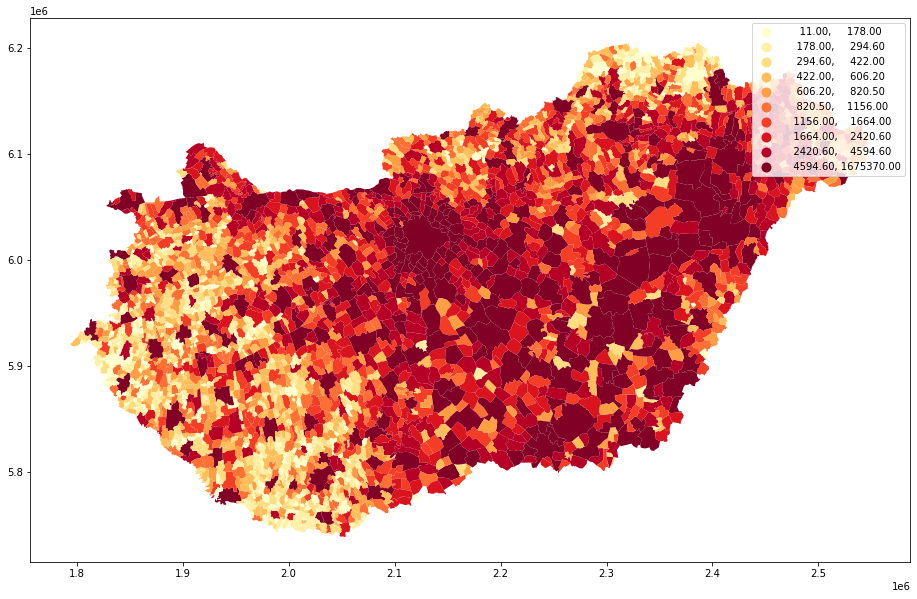

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create the plot
df.plot(column='All population', figsize=[20,10], legend=True, cmap='YlOrRd', scheme='quantiles', k=10)
plt.show()

## Task 2

Write a program that adds the population data for 2011 and 2020 to the Shapefile as new scalar fields to each city; and save it as a new Shapefile.

In [5]:
population_2011 = pd.read_csv('../data/hungary_population_2011.csv', delimiter = ';')
population_2011.set_index('City', inplace=True)

df = df.merge(population_2011, left_index=True, right_index=True, suffixes=[' 2020', ' 2011'])
df.rename(columns={'County 2020':'County'}, inplace=True)
del df['County 2011']
display(df)

,geometry,County,Male population 2020,Female population 2020,All population 2020,Male population 2011,Female population 2011,All population 2011
Aba,"POLYGON ((2053298.230 5953037.810, 2053422.400...",FEJ,2286,2359,4645,2273,2386,4659
Abaliget,"POLYGON ((2010640.140 5804436.120, 2010699.370...",BAR,351,334,685,315,338,653
Abasár,"POLYGON ((2223181.920 6072744.320, 2223372.480...",HEV,1168,1297,2465,1191,1348,2539
Abaújalpár,"POLYGON ((2362488.130 6156262.020, 2362552.180...",BOR,37,32,69,46,40,86
Abaújkér,"POLYGON ((2354110.960 6161271.720, 2354200.650...",BOR,290,314,604,329,378,707
...,...,...,...,...,...,...,...,...
Őrimagyarósd,"POLYGON ((1837790.790 5925016.100, 1837832.070...",VAS,117,113,230,114,116,230
Őriszentpéter,"POLYGON ((1821634.850 5916224.320, 1821691.900...",VAS,568,589,1157,571,613,1184
Őrtilos,"POLYGON ((1878544.010 5830691.040, 1878570.100...",SOM,250,230,480,285,267,552
Ősagárd,"POLYGON ((2132697.110 6082877.080, 2132823.710...",NOG,149,183,332,148,197,345


In [6]:
# Save it to file
df.to_file('hungary_population.shp')

<ipython-input-6-ac2d3a3b95d7>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('hungary_population.shp')


## Task 3

Write a program that creates a thematic map for Hungary based on the adminstrative boundaries of the cities and their population change between 2011 and 2020.

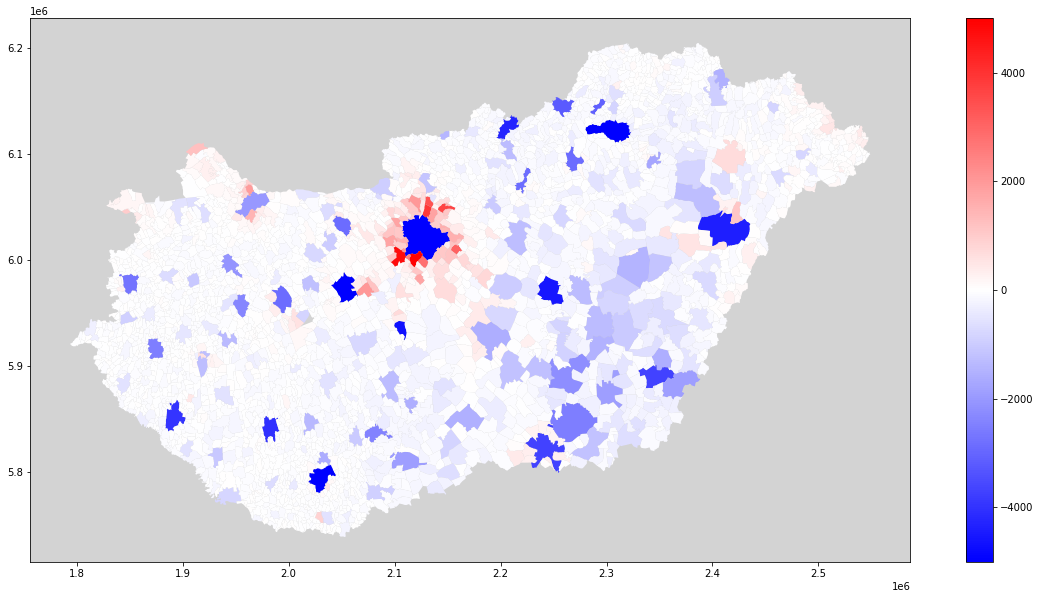

In [7]:
df['Population difference'] = df['All population 2020'] - df['All population 2011']

ax = df.plot(column='Population difference', figsize=[20,10], legend=True, cmap='bwr', vmin=-5000, vmax=5000)
ax.set_facecolor("lightgray") # background color
plt.show()

**Optional:** add a raster basemap with *contextily*.

epsg:3857


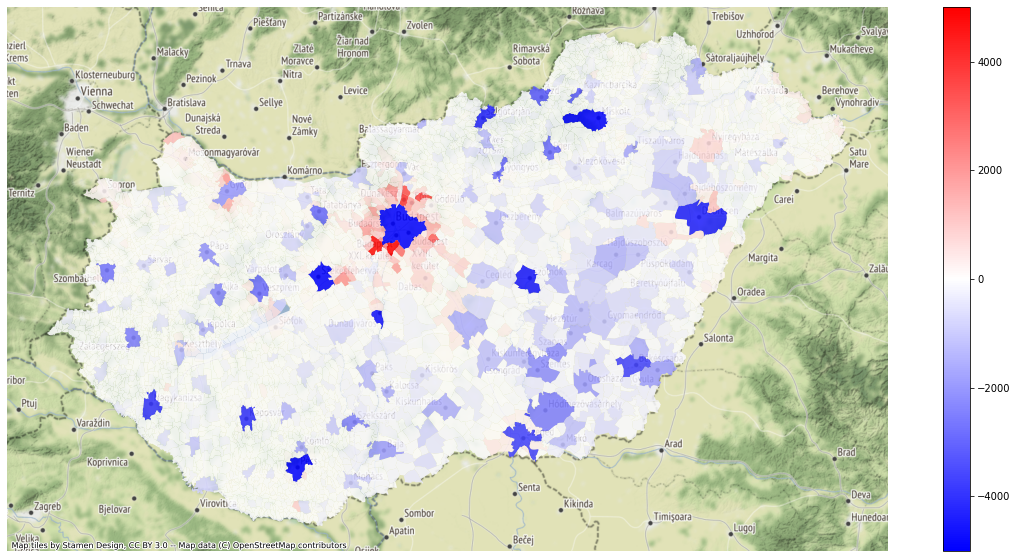

In [8]:
# How to install: conda install -c conda-forge contextily
# How to use: https://contextily.readthedocs.io/en/latest/
import contextily as ctx

# Verify CRS, must be Web Mercator (EPSG:3857) to add a base map with the contextily module.
print(df.crs)
if df.crs == 'epsg:3857':
    ax = df.plot(column='Population difference', figsize=[20,10], legend=True, cmap='bwr', vmin=-5000, vmax=5000, alpha=0.85)
    ctx.add_basemap(ax)
    ax.set_axis_off()
    plt.show()
else:
    print('CRS must be EPSG:3857, instead {0} was given'.format(df.crs))

## Task 4

Write a program that creates a thematic map for Hungary based on the adminstrative boundaries of the cities and their population density in 2020.

In [9]:
df_eov = df.to_crs('EPSG:23700') # EOV is EPSG:23700 
df['Area'] = df_eov.area / 10**6
df['Density 2020'] = df['All population 2020'] / df['Area'] 
display(df)

,geometry,County,Male population 2020,Female population 2020,All population 2020,Male population 2011,Female population 2011,All population 2011,Population difference,Area,Density 2020
Aba,"POLYGON ((2053298.230 5953037.810, 2053422.400...",FEJ,2286,2359,4645,2273,2386,4659,-14,87.912568,52.836586
Abaliget,"POLYGON ((2010640.140 5804436.120, 2010699.370...",BAR,351,334,685,315,338,653,32,16.180298,42.335438
Abasár,"POLYGON ((2223181.920 6072744.320, 2223372.480...",HEV,1168,1297,2465,1191,1348,2539,-74,20.923344,117.810996
Abaújalpár,"POLYGON ((2362488.130 6156262.020, 2362552.180...",BOR,37,32,69,46,40,86,-17,8.504453,8.113397
Abaújkér,"POLYGON ((2354110.960 6161271.720, 2354200.650...",BOR,290,314,604,329,378,707,-103,17.287535,34.938469
...,...,...,...,...,...,...,...,...,...,...,...
Őrimagyarósd,"POLYGON ((1837790.790 5925016.100, 1837832.070...",VAS,117,113,230,114,116,230,0,12.286093,18.720354
Őriszentpéter,"POLYGON ((1821634.850 5916224.320, 1821691.900...",VAS,568,589,1157,571,613,1184,-27,33.529498,34.506928
Őrtilos,"POLYGON ((1878544.010 5830691.040, 1878570.100...",SOM,250,230,480,285,267,552,-72,21.446678,22.381089
Ősagárd,"POLYGON ((2132697.110 6082877.080, 2132823.710...",NOG,149,183,332,148,197,345,-13,10.894851,30.473110


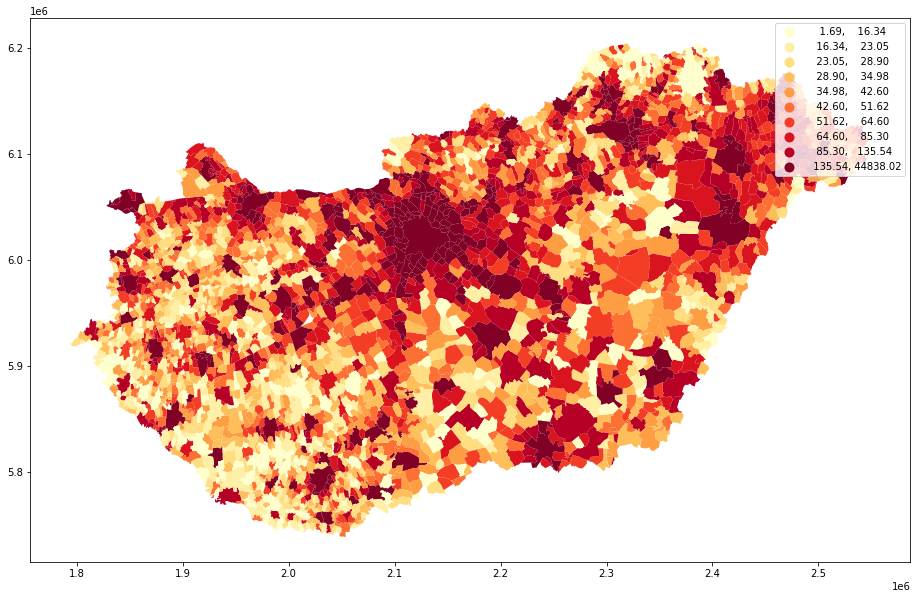

In [10]:
df.plot(column='Density 2020', figsize=[20,10], legend=True, cmap='YlOrRd', scheme='quantiles', k=10)
plt.show()